In [1]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from MLProject2Dataset import MLProject2Dataset, MLProject2DatasetSmall
from CNNModels import SimpleCNN
from helper_functions import image_transforms, plot_training_progress, train_net
import matplotlib.pyplot as plt

# 4. ΑΠΛΟ ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [2]:
# dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms(50, 62))
dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms(50, 62))

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [3]:
len(dataset)

1015

In [4]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [5]:
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [6]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=10)

Training on cuda
[Epoch: 0, batch:     0] Train loss: 0.194, Train acc: 0.094 | Validation loss: 1.796, Validation acc: 0.644
Epoch train loss 1.383, acc 0.572, validatio loss 1.220, acc: 0.644
[Epoch: 1, batch:     0] Train loss: 0.110, Train acc: 0.656 | Validation loss: 1.234, Validation acc: 0.644
Epoch train loss 1.165, acc 0.615, validatio loss 1.247, acc: 0.644
[Epoch: 2, batch:     0] Train loss: 0.119, Train acc: 0.609 | Validation loss: 1.294, Validation acc: 0.644
Epoch train loss 1.111, acc 0.633, validatio loss 1.254, acc: 0.644
[Epoch: 3, batch:     0] Train loss: 0.107, Train acc: 0.719 | Validation loss: 1.432, Validation acc: 0.644
Epoch train loss 1.145, acc 0.618, validatio loss 1.164, acc: 0.644
[Epoch: 4, batch:     0] Train loss: 0.121, Train acc: 0.594 | Validation loss: 1.162, Validation acc: 0.644
Epoch train loss 1.123, acc 0.633, validatio loss 1.207, acc: 0.644
[Epoch: 5, batch:     0] Train loss: 0.108, Train acc: 0.625 | Validation loss: 1.206, Validation 

## 4.3 Γράφημα απώλειας και ευστοχίας

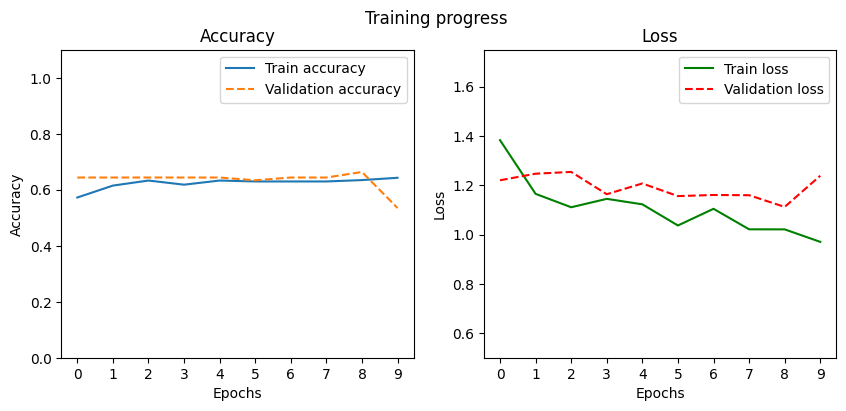

In [8]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

# 5. Σύνθετο ΣΝΔ